# Sentiment Analysis VADER - Covid19 artigos

In [1]:
# Versão do python

from platform import python_version

print('Versão python neste Jupyter Notebook:', python_version())

Versão python neste Jupyter Notebook: 3.8.8


In [2]:
# Importação das bibliotecas 

import pandas as pd # Pandas carregamento csv
import numpy as np # Numpy para carregamento cálculos em arrays multidimensionais

# Visualização de dados
import seaborn as sns
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

# Carregar as versões das bibliotecas
import watermark

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Versões das bibliotecas

%reload_ext watermark
%watermark -a "Versões das bibliotecas" --iversions

Author: Versões das bibliotecas

plotly    : 5.6.0
watermark : 2.3.0
pandas    : 1.2.4
matplotlib: 3.3.4
seaborn   : 0.11.1
numpy     : 1.20.1



In [4]:
# NLTK para NLP
import nltk
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
# Configuração para os gráficos largura e layout dos graficos

plt.style.use('fivethirtyeight')

# Base dados

In [6]:
df_1 = pd.read_csv("train.csv")
df_2 = pd.read_csv("test.csv")

df_1

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
20967,20968,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...,1,1,0,0,0,0
20968,20969,Uniform diamond coatings on WC-Co hard alloy c...,Polycrystalline diamond coatings have been g...,0,1,0,0,0,0
20969,20970,Analysing Soccer Games with Clustering and Con...,We present a new approach for identifying si...,1,0,0,0,0,0
20970,20971,On the Efficient Simulation of the Left-Tail o...,The sum of Log-normal variates is encountere...,0,0,1,1,0,0


In [7]:
# Exibido 5 primeiros dados
df_1.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [8]:
# Exibido 5 últimos dados 
df_1.tail(5)

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
20967,20968,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...,1,1,0,0,0,0
20968,20969,Uniform diamond coatings on WC-Co hard alloy c...,Polycrystalline diamond coatings have been g...,0,1,0,0,0,0
20969,20970,Analysing Soccer Games with Clustering and Con...,We present a new approach for identifying si...,1,0,0,0,0,0
20970,20971,On the Efficient Simulation of the Left-Tail o...,The sum of Log-normal variates is encountere...,0,0,1,1,0,0
20971,20972,Why optional stopping is a problem for Bayesians,"Recently, optional stopping has been a subje...",0,0,1,1,0,0


In [9]:
# Número de linhas e colunas
df_1.shape

(20972, 9)

In [10]:
# Verificando informações das variaveis
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20972 entries, 0 to 20971
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    20972 non-null  int64 
 1   TITLE                 20972 non-null  object
 2   ABSTRACT              20972 non-null  object
 3   Computer Science      20972 non-null  int64 
 4   Physics               20972 non-null  int64 
 5   Mathematics           20972 non-null  int64 
 6   Statistics            20972 non-null  int64 
 7   Quantitative Biology  20972 non-null  int64 
 8   Quantitative Finance  20972 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 1.4+ MB


In [11]:
# Tipo dos dados
df_1.dtypes

ID                       int64
TITLE                   object
ABSTRACT                object
Computer Science         int64
Physics                  int64
Mathematics              int64
Statistics               int64
Quantitative Biology     int64
Quantitative Finance     int64
dtype: object

In [12]:
# Total de colunas e linhas 

print("Números de linhas: {}" .format(df_1.shape[0]))
print("Números de colunas: {}" .format(df_1.shape[1]))

Números de linhas: 20972
Números de colunas: 9


In [13]:
# Exibindo valores ausentes e valores únicos

print("\nMissing values :  ", df_1.isnull().sum().values.sum())


Missing values :   0


# Análise de dados

In [17]:
# Removendo dados nulos

df_1.dropna(inplace=True)
df_2.dropna(inplace=True)

In [14]:
# Verificando base
df_1.value_counts()

ID     TITLE                                                                                                          ABSTRACT                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [16]:
# Verificando o total de sentimentos
df_1["ABSTRACT"].value_counts()

  Feature engineering has been the key to the success of many prediction\nmodels. However, the process is non-trivial and often requires manual feature\nengineering or exhaustive searching. DNNs are able to automatically learn\nfeature interactions; however, they generate all the interactions implicitly,\nand are not necessarily efficient in learning all types of cross features. In\nthis paper, we propose the Deep & Cross Network (DCN) which keeps the benefits\nof a DNN model, and beyond that, it introduces a novel cross network that is\nmore efficient in learning certain bounded-degree feature interactions. In\nparticular, DCN explicitly applies feature crossing at each layer, requires no\nmanual feature engineering, and adds negligible extra complexity to the DNN\nmodel. Our experimental results have demonstrated its superiority over the\nstate-of-art algorithms on the CTR prediction dataset and dense classification\ndataset, in terms of both model accuracy and memory usage.\n       

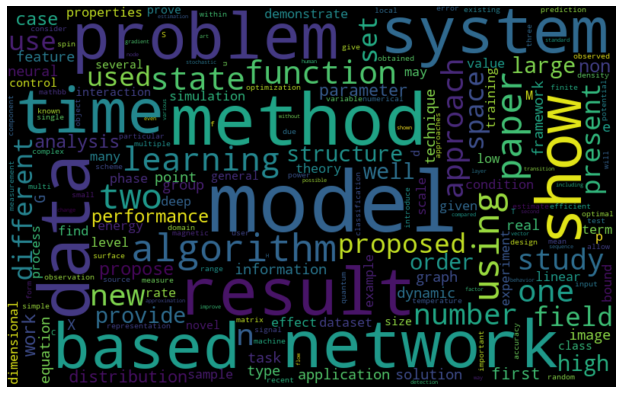

In [21]:
# Nuvem de palavras
%matplotlib inline
from wordcloud import WordCloud

todos_palavras = ' '.join([texto for texto in df_1["ABSTRACT"]])
nuvem_palavras = WordCloud(width = 800, height = 500, max_font_size = 110,
                          collocations = False).generate(todos_palavras)

plt.figure(figsize= (10, 7))
plt.imshow(nuvem_palavras, interpolation = 'bilinear')
plt.axis('off')
plt.show()

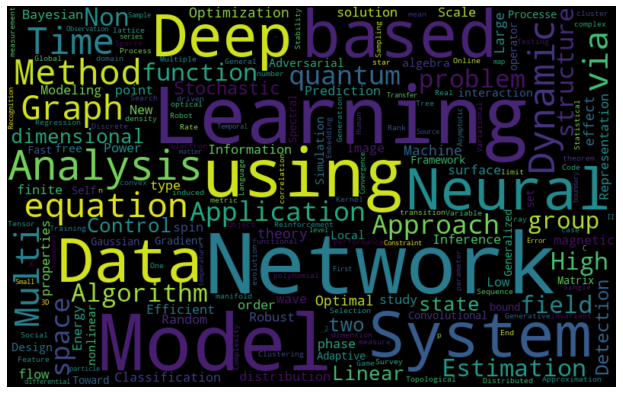

In [23]:
todos_palavras = ' '.join([texto for texto in df_1["TITLE"]])
nuvem_palavras = WordCloud(width = 800, height = 500, max_font_size = 110,
                          collocations = False).generate(todos_palavras)

plt.figure(figsize= (10, 7))
plt.imshow(nuvem_palavras, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Análise sentimento nas frases

In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

model_sid = SentimentIntensityAnalyzer()
model_sid.polarity_scores(df_1.iloc[0]['ABSTRACT'])

{'neg': 0.035, 'neu': 0.925, 'pos': 0.04, 'compound': 0.3182}

In [27]:
df_1['scores'] = df_1['ABSTRACT'].apply(lambda review:model_sid.polarity_scores(review))
df_1['compound'] = df_1['scores'].apply(lambda d:d['compound'])
df_1['score'] = df_1['compound'].apply(lambda score: 'pos' if score >=0 else 'neg')

df_1.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,scores,compound,score
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,"{'neg': 0.035, 'neu': 0.925, 'pos': 0.04, 'com...",0.3182,pos
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,"{'neg': 0.0, 'neu': 0.943, 'pos': 0.057, 'comp...",0.5267,pos
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,"{'neg': 0.0, 'neu': 0.901, 'pos': 0.099, 'comp...",0.8519,pos
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,"{'neg': 0.043, 'neu': 0.841, 'pos': 0.116, 'co...",0.6705,pos
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,"{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'comp...",0.9429,pos


Text(0, 0.5, 'Total')

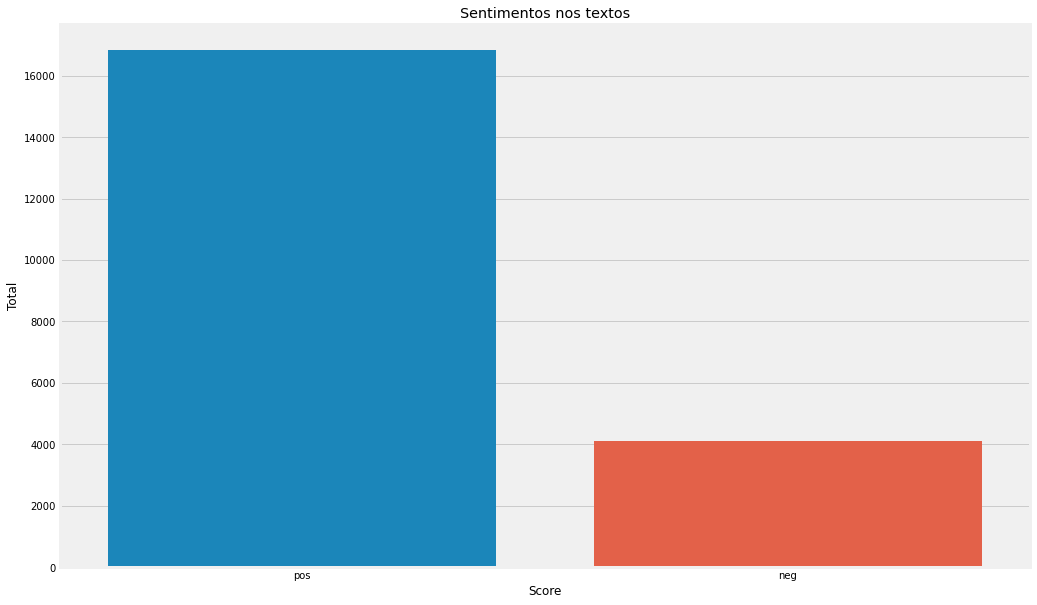

In [33]:
plt.figure(figsize=(15.5, 10))

plt.title("Sentimentos nos textos")
sns.countplot(df_1["score"])
plt.xlabel("Score")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

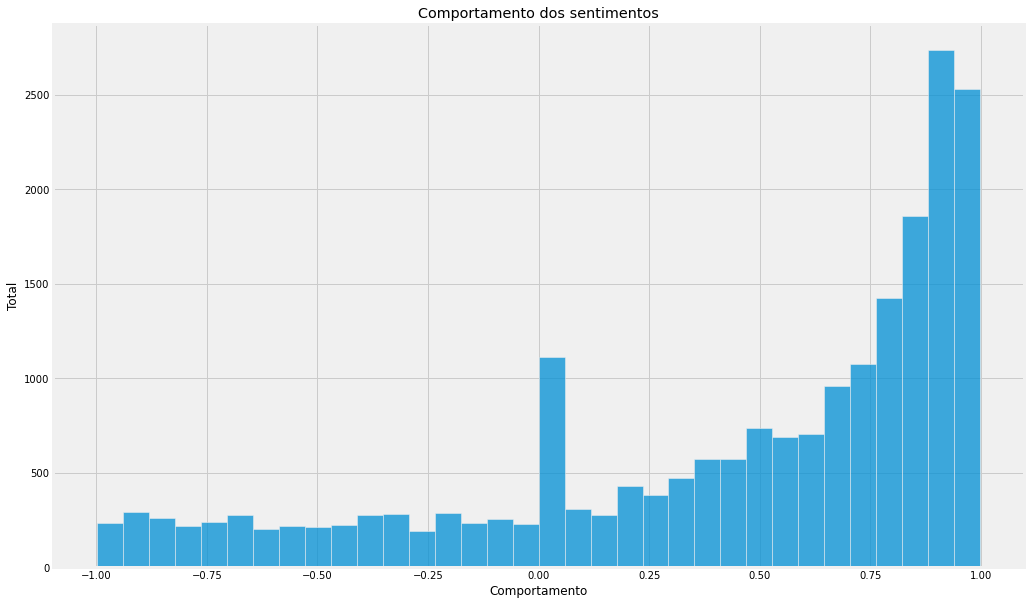

In [39]:
plt.figure(figsize=(15.5, 10))

sns.histplot(df_1["compound"])
plt.title("Comportamento dos sentimentos")
plt.xlabel("Comportamento")
plt.ylabel("Total")

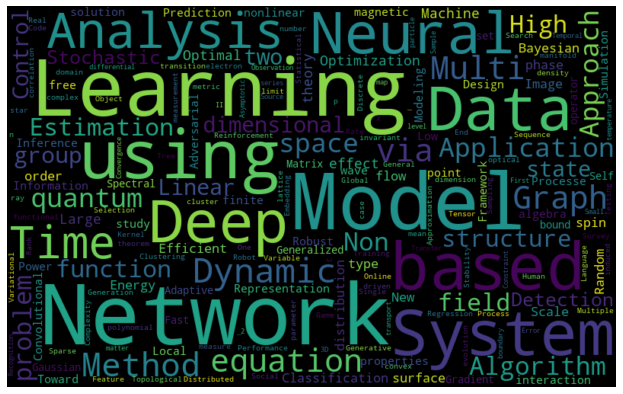

In [42]:
# Nuvem de palavras
%matplotlib inline
from wordcloud import WordCloud

todos_palavras = ' '.join([texto for texto in df_1["TITLE"]])
nuvem_palavras = WordCloud(width = 800, height = 500, max_font_size = 110,
                          collocations = False).generate(todos_palavras)

plt.figure(figsize= (10, 7))
plt.imshow(nuvem_palavras, interpolation = 'bilinear')
plt.axis('off')
plt.show()